In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from functions import *
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from functions1 import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox
from matplotlib import pyplot

### Introduction

Mes missions :
Vous vous concentrerez uniquement sur la pr√©diction de la demande en √©lectricit√©.

Corrigez les donn√©es de consommation mensuelles de l'effet temp√©rature (dues au chauffage √©lectrique) en utilisant une r√©gression lin√©aire.

Effectuez une d√©saisonnalisation de la consommation que vous aurez obtenue apr√®s correction, gr√¢ce aux moyennes mobiles.
Effectuez une pr√©vision de la consommation (corrig√©e de l'effet temp√©rature) sur un an, en utilisant la m√©thode de Holt Winters (lissage exponentiel) puis la m√©thode SARIMA sur la s√©rie temporelle.

Pour chaque traitement effectu√© (correction de l'effet temp√©rature, d√©saisonnalisation, etc.), vous pr√©senterez les 2 s√©ries temporelles avant et apr√®s traitement, sur un graphique o√π les deux s√©ries temporelles seront superpos√©es.

### Le jeu de donn√©es m√©t√©o

https://cegibat.grdf.fr/simulateur/calcul-dju

![title](images/clime.png)

![title](images/chauffage.png)

#### Chauffage

In [2]:
meteo_chauffage=pd.read_excel("data/Chauffage.xlsx",skiprows=11)
meteo_chauffage=meteo_chauffage.rename(columns={"Unnamed: 0":"Ann√©e","JAN": "01",
                      "F√âV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AO√õ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "D√âC":"12"})

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#meteo_chauffage.loc[meteo_chauffage['Ann√©e']== 2020 ,:]

In [4]:
#indexNames =meteo_chauffage.loc[meteo_chauffage['Ann√©e']== 2020 ,:].index

In [5]:
#meteo_chauffage.drop(indexNames , inplace=True)
meteo_chauffage

Ann√©e     01     02     03     04     05    06    07    08    09     10  \
0    2021  396.7  302.8  271.0  228.3  138.3   1.4   0.0   0.0   0.0    0.0   
1    2020  339.0  249.6  268.6   81.4   65.7  20.6   0.9   4.5  34.3  157.5   
2    2019  404.9  268.3  233.1  168.5  117.9  24.4   0.0   1.7  26.7  133.7   
3    2018  303.4  432.6  314.3  119.7   55.9   8.1   0.0   3.3  34.3  122.4   
4    2017  467.9  278.4  206.1  182.6   75.0   9.4   1.0   6.8  62.6   99.4   
5    2016  364.4  321.6  321.1  212.1   88.1  27.5   5.7   3.2  11.7  176.0   
6    2015  392.0  365.7  275.5  141.1   91.5  15.8   6.9   6.1  71.9  176.9   
7    2014  324.4  281.9  223.9  135.5  100.2  19.1   8.3  19.3  16.0   92.3   
8    2013  429.2  402.2  376.6  209.5  158.4  43.6   0.6   5.0  41.5  105.0   
9    2012  336.0  435.9  201.9  230.3   83.3  35.0  12.4   2.4  58.0  154.6   
10   2011  392.0  304.8  243.1   77.6   43.4  31.4  15.0  11.9  23.2  127.6   
11   2010  499.2  371.4  294.5  165.3  140.9  22.6   0.0  11.1  52.3  172.2   
12   2009  486.8  365.7  293.2  135.1   82.2  39.8   3.1   0.9  26.9  149.6   

       11     12   Total  
0     0.0    0.0  1338.2  
1   227.2  336.8  1785.9  
2   282.6  327.3  1989.0  
3   282.5  325.9  2002.2  
4   282.6  369.0  2040.6  
5   285.6  390.8  2207.3  
6   195.0  248.1  1986.2  
7   222.6  368.2  1811.5  
8   303.9  349.5  2424.8  
9   296.2  345.9  2191.5  
10  226.6  312.7  1809.0  
11  310.0  512.0  2551.1  
12  224.7  411.8  2219.7

In [6]:
meteo_chauffage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ann√©e   13 non-null     int64  
 1   01      13 non-null     float64
 2   02      13 non-null     float64
 3   03      13 non-null     float64
 4   04      13 non-null     float64
 5   05      13 non-null     float64
 6   06      13 non-null     float64
 7   07      13 non-null     float64
 8   08      13 non-null     float64
 9   09      13 non-null     float64
 10  10      13 non-null     float64
 11  11      13 non-null     float64
 12  12      13 non-null     float64
 13  Total   13 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.5 KB


In [7]:
meteo_chauffage.columns

Index(['Ann√©e', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', 'Total'],
      dtype='object')

In [8]:
meteo_chauffage=meteo_chauffage.set_index('Ann√©e')
meteo_chauffage=meteo_chauffage.drop(columns=['Total'])
meteo_chauffage

01     02     03     04     05    06    07    08    09     10  \
Ann√©e                                                                     
2021   396.7  302.8  271.0  228.3  138.3   1.4   0.0   0.0   0.0    0.0   
2020   339.0  249.6  268.6   81.4   65.7  20.6   0.9   4.5  34.3  157.5   
2019   404.9  268.3  233.1  168.5  117.9  24.4   0.0   1.7  26.7  133.7   
2018   303.4  432.6  314.3  119.7   55.9   8.1   0.0   3.3  34.3  122.4   
2017   467.9  278.4  206.1  182.6   75.0   9.4   1.0   6.8  62.6   99.4   
2016   364.4  321.6  321.1  212.1   88.1  27.5   5.7   3.2  11.7  176.0   
2015   392.0  365.7  275.5  141.1   91.5  15.8   6.9   6.1  71.9  176.9   
2014   324.4  281.9  223.9  135.5  100.2  19.1   8.3  19.3  16.0   92.3   
2013   429.2  402.2  376.6  209.5  158.4  43.6   0.6   5.0  41.5  105.0   
2012   336.0  435.9  201.9  230.3   83.3  35.0  12.4   2.4  58.0  154.6   
2011   392.0  304.8  243.1   77.6   43.4  31.4  15.0  11.9  23.2  127.6   
2010   499.2  371.4  294.5  165.3  140.9  22.6   0.0  11.1  52.3  172.2   
2009   486.8  365.7  293.2  135.1   82.2  39.8   3.1   0.9  26.9  149.6   

          11     12  
Ann√©e                
2021     0.0    0.0  
2020   227.2  336.8  
2019   282.6  327.3  
2018   282.5  325.9  
2017   282.6  369.0  
2016   285.6  390.8  
2015   195.0  248.1  
2014   222.6  368.2  
2013   303.9  349.5  
2012   296.2  345.9  
2011   226.6  312.7  
2010   310.0  512.0  
2009   224.7  411.8

In [9]:
meteo_chauffage.columns

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object')

In [10]:
meteo_newformat_chau={'mois':[],'chauffage':[]}
for Ann√©e in meteo_chauffage.index.values:
    for mois in meteo_chauffage.columns:
        meteo_newformat_chau['mois'].append(f"{Ann√©e}-{mois}-01")
        meteo_newformat_chau['chauffage'].append(meteo_chauffage.loc[Ann√©e,mois])

meteo_newformat_chau=pd.DataFrame(meteo_newformat_chau)
meteo_newformat_chau['mois']=pd.to_datetime(meteo_newformat_chau['mois'])

In [11]:
meteo_newformat_chau.head(n=5)

mois  chauffage
0 2021-01-01      396.7
1 2021-02-01      302.8
2 2021-03-01      271.0
3 2021-04-01      228.3
4 2021-05-01      138.3

#### Climatisation

In [12]:
meteo_climat=pd.read_excel("data/Climatisation.xlsx",skiprows=11)
meteo_climat=meteo_climat.rename(columns={"Unnamed: 0":"Ann√©e","JAN": "01",
                      "F√âV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AO√õ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "D√âC":"12"})

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [13]:
meteo_climat

Ann√©e  01  02   03    04    05     06     07     08    09    10   11  12  \
0    2021   0   0  0.2   0.9   5.1   47.6    0.0    0.0   0.0   0.0  0.0   0   
1    2020   0   0  0.0  11.5  28.6   57.5   96.6  157.0  72.3   0.0  0.0   0   
2    2019   0   0  0.0   5.7   3.2  100.1  152.3  115.6  22.6   4.0  0.0   0   
3    2018   0   0  0.0  16.1  42.9   74.6  198.7  126.3  33.2  17.0  0.0   0   
4    2017   0   0  0.0   0.0  47.2  111.9  108.3   80.5   8.5   2.7  0.0   0   
5    2016   0   0  0.0   0.0   8.5   37.0  105.6  121.4  59.1   0.0  0.0   0   
6    2015   0   0  0.0   2.3   2.8   64.8  139.1  122.4   1.0   0.0  0.3   0   
7    2014   0   0  0.0   0.0   2.2   41.3  101.1   35.7  45.8   7.1  0.0   0   
8    2013   0   0  0.0   3.8   0.0   29.9  152.1   89.2  27.1   4.3  0.0   0   
9    2012   0   0  0.0   0.0  30.1   25.6   60.4  117.9  20.4   1.4  0.0   0   
10   2011   0   0  0.0  12.6  21.6   54.1   30.8   74.7  49.8  10.9  0.0   0   
11   2010   0   0  0.0   3.3  16.1   64.3  134.7   59.2   8.0   4.3  0.0   0   
12   2009   0   0  0.0   0.0  12.3   45.1   86.7  117.9  15.2   4.8  0.0   0   

    Total  
0    53.8  
1   423.4  
2   403.3  
3   508.7  
4   358.9  
5   331.5  
6   332.6  
7   233.0  
8   306.2  
9   255.6  
10  254.5  
11  289.7  
12  281.9

In [14]:
#meteo_climat.loc[meteo_climat['Ann√©e']== 2020 ,:]

In [15]:
#IndexNames =meteo_climat.loc[meteo_climat['Ann√©e']== 2020 ,:].index

In [16]:
#meteo_climat.drop(IndexNames , inplace=True)
meteo_climat

Ann√©e  01  02   03    04    05     06     07     08    09    10   11  12  \
0    2021   0   0  0.2   0.9   5.1   47.6    0.0    0.0   0.0   0.0  0.0   0   
1    2020   0   0  0.0  11.5  28.6   57.5   96.6  157.0  72.3   0.0  0.0   0   
2    2019   0   0  0.0   5.7   3.2  100.1  152.3  115.6  22.6   4.0  0.0   0   
3    2018   0   0  0.0  16.1  42.9   74.6  198.7  126.3  33.2  17.0  0.0   0   
4    2017   0   0  0.0   0.0  47.2  111.9  108.3   80.5   8.5   2.7  0.0   0   
5    2016   0   0  0.0   0.0   8.5   37.0  105.6  121.4  59.1   0.0  0.0   0   
6    2015   0   0  0.0   2.3   2.8   64.8  139.1  122.4   1.0   0.0  0.3   0   
7    2014   0   0  0.0   0.0   2.2   41.3  101.1   35.7  45.8   7.1  0.0   0   
8    2013   0   0  0.0   3.8   0.0   29.9  152.1   89.2  27.1   4.3  0.0   0   
9    2012   0   0  0.0   0.0  30.1   25.6   60.4  117.9  20.4   1.4  0.0   0   
10   2011   0   0  0.0  12.6  21.6   54.1   30.8   74.7  49.8  10.9  0.0   0   
11   2010   0   0  0.0   3.3  16.1   64.3  134.7   59.2   8.0   4.3  0.0   0   
12   2009   0   0  0.0   0.0  12.3   45.1   86.7  117.9  15.2   4.8  0.0   0   

    Total  
0    53.8  
1   423.4  
2   403.3  
3   508.7  
4   358.9  
5   331.5  
6   332.6  
7   233.0  
8   306.2  
9   255.6  
10  254.5  
11  289.7  
12  281.9

In [17]:
meteo_climat=meteo_climat.set_index('Ann√©e')
meteo_climat=meteo_climat.drop(columns=['Total'])

In [18]:
meteo_climat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2021 to 2009
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   01      13 non-null     int64  
 1   02      13 non-null     int64  
 2   03      13 non-null     float64
 3   04      13 non-null     float64
 4   05      13 non-null     float64
 5   06      13 non-null     float64
 6   07      13 non-null     float64
 7   08      13 non-null     float64
 8   09      13 non-null     float64
 9   10      13 non-null     float64
 10  11      13 non-null     float64
 11  12      13 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 1.3 KB


In [19]:
meteo_newformat_clim={'mois':[],'climatisation':[]}

for Ann√©e in meteo_climat.index.values:
    for mois in meteo_climat.columns:
        meteo_newformat_clim['mois'].append(f"{Ann√©e}-{mois}-01")
        meteo_newformat_clim['climatisation'].append(meteo_climat.loc[Ann√©e,mois])

meteo_newformat_clim=pd.DataFrame(meteo_newformat_clim)
meteo_newformat_clim['mois']=pd.to_datetime(meteo_newformat_clim['mois'])

In [20]:
meteo_newformat_clim.head(n=9)

mois  climatisation
0 2021-01-01            0.0
1 2021-02-01            0.0
2 2021-03-01            0.2
3 2021-04-01            0.9
4 2021-05-01            5.1
5 2021-06-01           47.6
6 2021-07-01            0.0
7 2021-08-01            0.0
8 2021-09-01            0.0

In [21]:
dju=meteo_newformat_clim.merge(meteo_newformat_chau,on='mois',how='inner')
dju

mois  climatisation  chauffage
0   2021-01-01            0.0      396.7
1   2021-02-01            0.0      302.8
2   2021-03-01            0.2      271.0
3   2021-04-01            0.9      228.3
4   2021-05-01            5.1      138.3
..         ...            ...        ...
151 2009-08-01          117.9        0.9
152 2009-09-01           15.2       26.9
153 2009-10-01            4.8      149.6
154 2009-11-01            0.0      224.7
155 2009-12-01            0.0      411.8

[156 rows x 3 columns]

In [22]:
dju['dju']=dju['chauffage']+dju['climatisation']
dju

mois  climatisation  chauffage    dju
0   2021-01-01            0.0      396.7  396.7
1   2021-02-01            0.0      302.8  302.8
2   2021-03-01            0.2      271.0  271.2
3   2021-04-01            0.9      228.3  229.2
4   2021-05-01            5.1      138.3  143.4
..         ...            ...        ...    ...
151 2009-08-01          117.9        0.9  118.8
152 2009-09-01           15.2       26.9   42.1
153 2009-10-01            4.8      149.6  154.4
154 2009-11-01            0.0      224.7  224.7
155 2009-12-01            0.0      411.8  411.8

[156 rows x 4 columns]

In [23]:
dju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mois           156 non-null    datetime64[ns]
 1   climatisation  156 non-null    float64       
 2   chauffage      156 non-null    float64       
 3   dju            156 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.1 KB


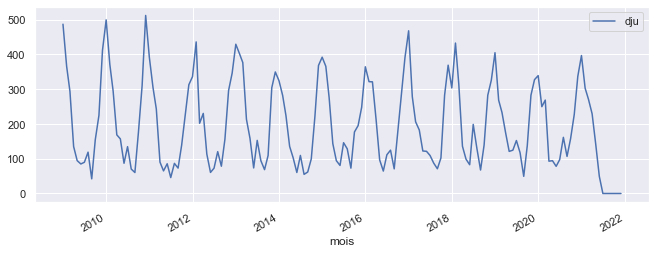

In [24]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
# S√©rie sunspot : nombre annuel de t√¢ches solaires de 1790 √† 1970
dju.plot(y="dju",x='mois');

In [25]:
df = pd.read_csv("data/conso.csv",
                 encoding = "ISO-8859-1",
                 engine='python',
                 sep="\t")
df=df[['Mois','Territoire','Consommation totale']]

In [26]:
df

Mois        Territoire  Consommation totale
0     2012-01            France                51086
1     2012-02            France                54476
2     2012-03            France                43156
3     2012-04            France                40176
4     2012-05            France                35257
...       ...               ...                  ...
1294  2021-03         Occitanie                 3332
1295  2021-03         Normandie                 2624
1296  2021-03   Hauts-de-France                 4566
1297  2021-03              PACA                 3597
1298  2021-03  Pays-de-la-Loire                 2534

[1299 rows x 3 columns]

In [27]:
consommation_france=df.loc[df['Territoire']=='France',['Mois','Consommation totale']]
consommation_france=consommation_france.drop(consommation_france.index[0]).reset_index(drop=True)
consommation_france['Mois']=pd.to_datetime(consommation_france["Mois"])
consommation_france=consommation_france.loc[consommation_france['Consommation totale']>0,:]

In [28]:
consommation_france=consommation_france.rename(columns={'Consommation totale': 'Consommation_totale'})

In [29]:
consommation_france.head(n=5)

Mois  Consommation_totale
0 2012-02-01                54476
1 2012-03-01                43156
2 2012-04-01                40176
3 2012-05-01                35257
4 2012-06-01                33219

In [30]:
consommation_france.tail(n=4)

Mois  Consommation_totale
106 2020-12-01                47565
107 2021-01-01                53006
108 2021-02-01                42979
109 2021-03-01                43341

In [31]:
consommation_france.info()
#On peut noter que nous n'avons pas de donn√©es manquantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Mois                 110 non-null    datetime64[ns]
 1   Consommation_totale  110 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 KB


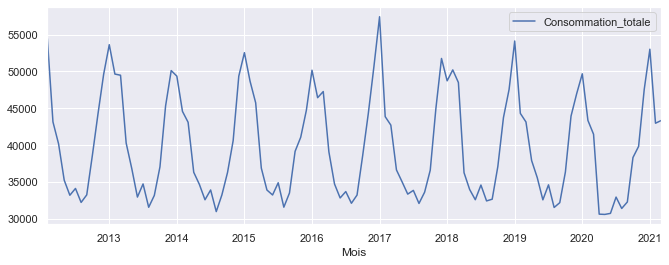

In [32]:
sns.set(rc={'figure.figsize':(11, 4)})
consommation_france.plot(y="Consommation_totale",x='Mois');

In [33]:
print(dju.shape)

(156, 4)


In [34]:
print(consommation_france.shape)

(110, 2)


In [35]:
Elec=consommation_france.merge(dju,left_on='Mois',right_on='mois')

In [36]:
Elec

Mois  Consommation_totale       mois  climatisation  chauffage  \
0   2012-02-01                54476 2012-02-01            0.0      435.9   
1   2012-03-01                43156 2012-03-01            0.0      201.9   
2   2012-04-01                40176 2012-04-01            0.0      230.3   
3   2012-05-01                35257 2012-05-01           30.1       83.3   
4   2012-06-01                33219 2012-06-01           25.6       35.0   
..         ...                  ...        ...            ...        ...   
105 2020-11-01                39840 2020-11-01            0.0      227.2   
106 2020-12-01                47565 2020-12-01            0.0      336.8   
107 2021-01-01                53006 2021-01-01            0.0      396.7   
108 2021-02-01                42979 2021-02-01            0.0      302.8   
109 2021-03-01                43341 2021-03-01            0.2      271.0   

       dju  
0    435.9  
1    201.9  
2    230.3  
3    113.4  
4     60.6  
..     ...  
105  227.2  
106  336.8  
107  396.7  
108  302.8  
109  271.2  

[110 rows x 6 columns]

In [37]:
print(Elec.columns)

Index(['Mois', 'Consommation_totale', 'mois', 'climatisation', 'chauffage',
       'dju'],
      dtype='object')


In [38]:
Elec=Elec.drop(['mois','chauffage','climatisation'],axis=1).set_index('Mois')

In [39]:
Elec= Elec[:-1]
Elec=Elec.fillna(0)

In [40]:
Elec.describe()

Consommation_totale         dju
count           109.000000  109.000000
mean          39784.605505  201.462385
std            7091.369846  113.810190
min           30622.000000   49.300000
25%           33374.000000  102.400000
50%           37102.000000  161.500000
75%           44960.000000  296.200000
max           57406.000000  467.900000

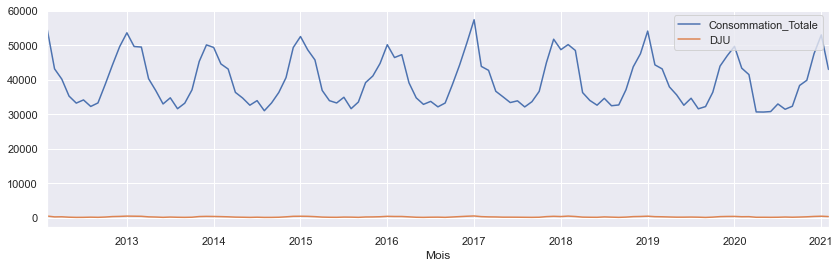

In [41]:
Elec['Consommation_totale'].plot(figsize=(14,4),label="Consommation_Totale")
Elec['dju'].plot(figsize=(14,4),label="DJU")
plt.legend();

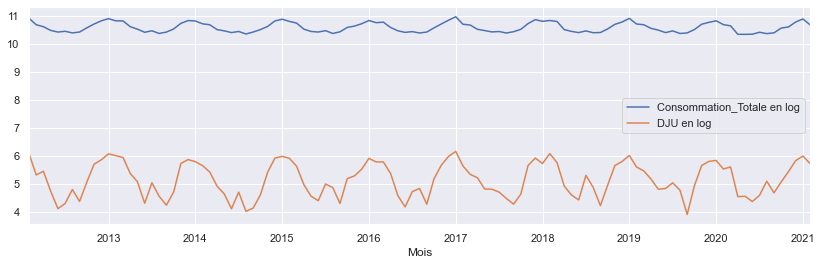

In [42]:
np.log(Elec['Consommation_totale']).plot(figsize=(14,4),label="Consommation_Totale en log")
np.log(Elec['dju']).plot(figsize=(14,4),label="DJU en log")
plt.legend();

# Q_1

Corrigez les donn√©es de consommation mensuelles de l'effet temp√©rature (dues au chauffage √©lectrique) en utilisant une r√©gression lin√©aire.

## D√©saisonnalisez √† l'aide de la r√©gression lin√©aire

![title](images/addi-multi.png)

In [43]:
Elec.head(n=2)

Consommation_totale    dju
Mois                                  
2012-02-01                54476  435.9
2012-03-01                43156  201.9

In [44]:
Elec['t']=range(1, Elec.shape[0]+1)

In [45]:
Elec.head(n=5)

Consommation_totale    dju  t
Mois                                     
2012-02-01                54476  435.9  1
2012-03-01                43156  201.9  2
2012-04-01                40176  230.3  3
2012-05-01                35257  113.4  4
2012-06-01                33219   60.6  5

In [46]:
y=Elec['Consommation_totale']
x=Elec.drop(columns=['Consommation_totale'])

In [47]:
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)
regression=reg.fit(x, y)
regression

LinearRegression()

In [48]:
print(reg.coef_,reg.intercept_)
#Ici nous avons le coefficient du dju et le 2√®me coeff correspond √† t=temps
#les coeff sont affich√©s ds cette ordre puisque ils sont ds cet ordre ds le dataset


[ 60.35192562 -14.68978545] 28433.900809390787


In [49]:
#le coefficient du dju 
c = reg.coef_[0]
c 

60.351925623451834

In [50]:
# calcule de serie corrig√©e
serie_corrigee = Elec['Consommation_totale'] - Elec['dju']*c 
serie_corrigee 

Mois
2012-02-01    28168.595621
2012-03-01    30970.946217
2012-04-01    26276.951529
2012-05-01    28413.091634
2012-06-01    29561.673307
                  ...     
2020-10-01    28826.571714
2020-11-01    26128.042498
2020-12-01    27238.471450
2021-01-01    29064.391105
2021-02-01    24704.436921
Length: 109, dtype: float64

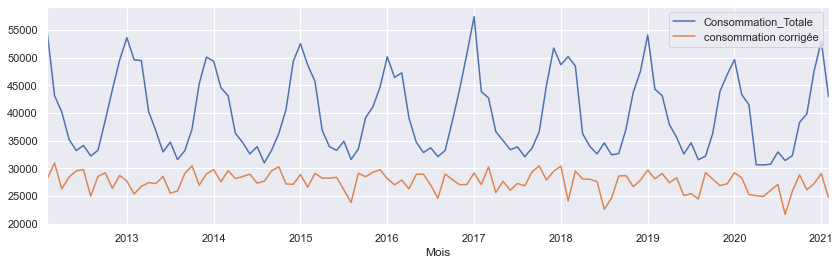

In [51]:
#serie_corrigee = x_cvs.rename("CVS")
Elec['Consommation_totale'].plot(figsize=(14,4),label="Consommation_Totale")
serie_corrigee.plot(label='consommation corrig√©e')
plt.legend();

In [52]:
#Elec.corr(method="pearson")
Elec.corr(method='pearson').style.format('{:8}').background_gradient(cmap=pyplot.get_cmap("coolwarm"))#coeff corr pearson  

In [53]:
Elec.Consommation_totale.values.reshape(1,-1).shape

(1, 109)

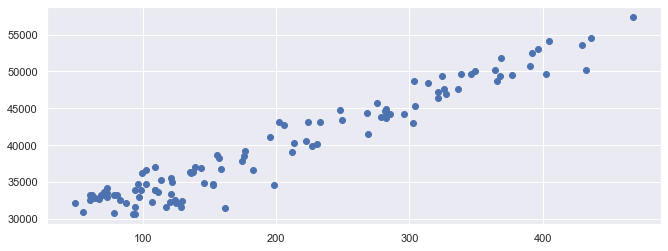

In [54]:
plt.scatter(Elec.dju,Elec.Consommation_totale);
#plt.plot(Elec.dju,regression.predict(Elec.Consommation_totale.values.reshape(1,-1)),Elec.dju)

# Q_2

Effectuez une d√©saisonnalisation de la consommation que vous aurez obtenue apr√®s correction, gr√¢ce aux moyennes mobiles.

In [55]:
reg_multip = smf.ols('Consommation_totale ~ dju', data=Elec).fit()

In [56]:
print(reg_multip.summary())

                             OLS Regression Results                            
Dep. Variable:     Consommation_totale   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     1611.
Date:                 Mon, 08 Nov 2021   Prob (F-statistic):           2.46e-66
Time:                         23:49:59   Log-Likelihood:                -969.31
No. Observations:                  109   AIC:                             1943.
Df Residuals:                      107   BIC:                             1948.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.763e+04    347.403     79.53

In [57]:
serie_corr_Elec = pd.DataFrame({'Mois':serie_corrigee.index, 'corrigee':serie_corrigee.values})

### Test de normalit√© des r√©sidus

In [58]:
# shapiro
shapiro(reg_multip.resid)

ShapiroResult(statistic=0.964981734752655, pvalue=0.0057502915151417255)

la test de normalit√© n'est pas rejet car p>0.05

In [59]:
#reg_multip.plot_diagnostics(figsize=(16, 10))
#plt.tight_layout()
#plt.show()

[('Lagrande multiplier statistic', 0.510542090451406), ('p-value', 0.4749042834015045), ('f-value', 0.5035328291882991), ('f p-value', 0.47949540648505273)]
Shapiro pvalue : 0.0057501704432070255


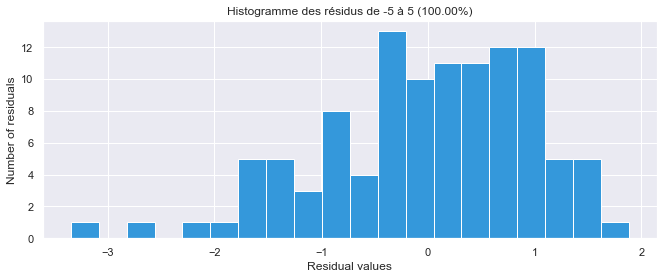

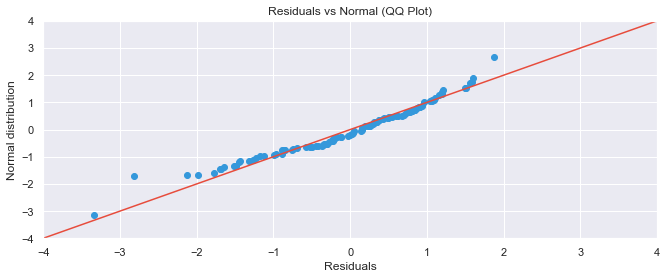

In [60]:
linear_regression_analysis(reg_multip)

# D√©saisonnaliser 

In [61]:
serie_corr_Elec.tail(n=8)

Mois      corrigee
101 2020-07-01  27085.687252
102 2020-08-01  21681.164012
103 2020-09-01  25873.484729
104 2020-10-01  28826.571714
105 2020-11-01  26128.042498
106 2020-12-01  27238.471450
107 2021-01-01  29064.391105
108 2021-02-01  24704.436921

#### moyenne mobile

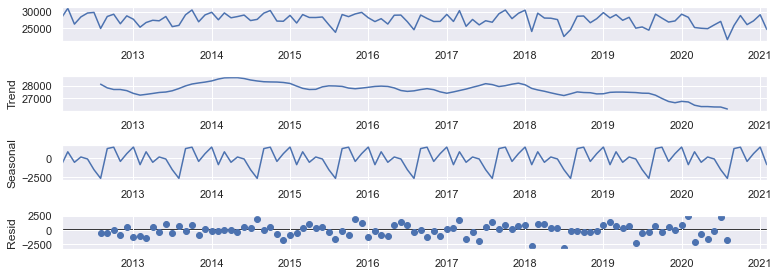

In [62]:
# algo simplifie de d√©composition saisioni√®re √† l'aide de moyennes mobile 
decomp_x = seasonal_decompose(serie_corrigee, model='additive')
decomp_x.plot()
plt.show() ;

In [63]:
serie_corr_Elec['corrigee-saison']=serie_corrigee.values-decomp_x.seasonal.values

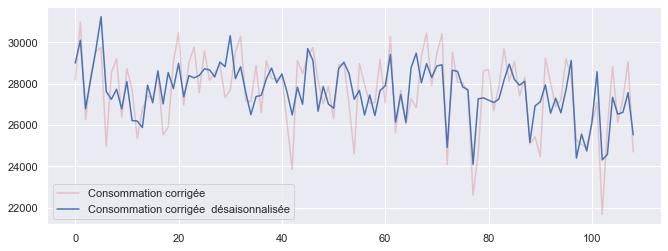

In [64]:
plt.plot(serie_corr_Elec["corrigee"],'r', label="Consommation corrig√©e",alpha=0.25)
plt.plot(serie_corr_Elec["corrigee-saison"],'b', label="Consommation corrig√©e  d√©saisonnalis√©e")
plt.legend()
plt.show()

##### la m√©thode de Holt-Winters :

In [65]:
x_tronc = serie_corr_Elec.iloc[:-12,:]
x_tronc

Mois      corrigee  corrigee-saison
0  2012-02-01  28168.595621     28999.082990
1  2012-03-01  30970.946217     30099.702981
2  2012-04-01  26276.951529     26791.685562
3  2012-05-01  28413.091634     28229.184576
4  2012-06-01  29561.673307     29642.902326
..        ...           ...              ...
92 2019-10-01  28056.539842     26573.696583
93 2019-11-01  26889.545819     27290.820321
94 2019-12-01  27220.814743     26595.134156
95 2020-01-01  29216.697214     27718.455357
96 2020-02-01  28294.159364     29124.646733

[97 rows x 3 columns]

In [66]:
y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [67]:
hw.params

{'smoothing_level': 0.040357142857142855,
 'smoothing_trend': 0.040357142857142855,
 'smoothing_seasonal': 0.3770025510204082,
 'damping_trend': nan,
 'initial_level': 26923.387046897282,
 'initial_trend': -46.11222240229043,
 'initial_seasons': array([ 1245.20857384,  4047.55916973,  -646.43551798,  1489.7045874 ,
         2638.28626032,  2823.99276772, -1936.7236994 ,  1614.02198422,
         2289.71255584,  -539.62741656,  1802.88187995,   792.56647552]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

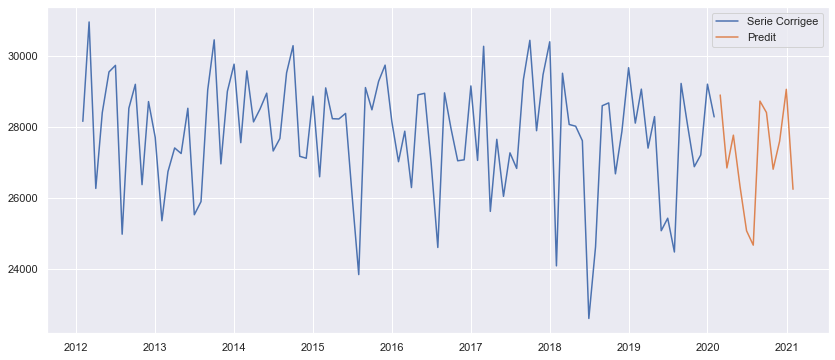

In [68]:
plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), hw_pred, label='Predit')
plt.legend() ;

In [69]:
serie_corr_Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mois             109 non-null    datetime64[ns]
 1   corrigee         109 non-null    float64       
 2   corrigee-saison  109 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


In [70]:
x_tronc = serie_corr_Elec.iloc[:-12,:]
#y_tronc = np.log(x_tronc)
x_a_prevoir = serie_corr_Elec.iloc[-12:,:]

In [71]:
y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
x_a_prevoir['prediction']=hw_pred.copy()

<ipython-input-72-c18679352a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a_prevoir['prediction']=hw_pred.copy()


In [73]:
MAE=np.abs(x_a_prevoir['corrigee']-x_a_prevoir['prediction']).mean()
MAE

1620.9409644067662

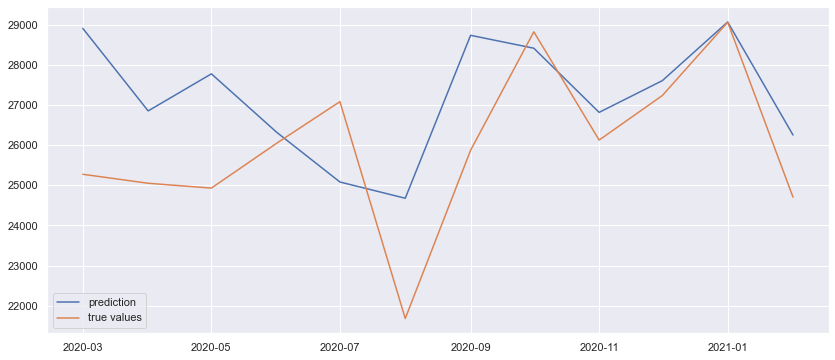

In [74]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['prediction'], label='prediction')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='true values')
plt.legend()

## SARIMA

### Stationnarisation

In [75]:
adfuller(serie_corr_Elec['corrigee'])[1]

0.8294104500821697

adfuller : H0 la serie n'est pas stationnaire'

In [76]:
kpss(serie_corr_Elec['corrigee'])[1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


0.03370308846693693

P_values

KPSS : H0 la serie est stationnaire 
    
    P_values<5% rejette H0

Ici on accepte mais la P-value tres proche du seuil critique

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


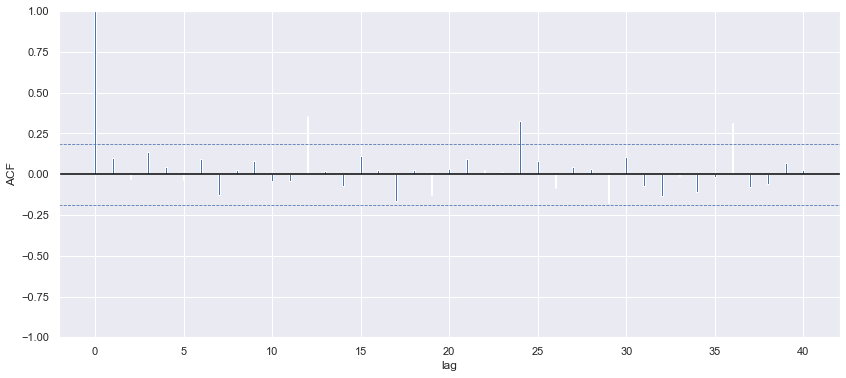

In [77]:
y_len = len(serie_corr_Elec['corrigee']) # variable n√©cessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(serie_corr_Elec['corrigee'])), y_len)

La sortie ACF pr√©sente une d√©croissance lente vers 0, ce qui traduit un probl√®me de non-stationnarit√©. On effectue donc une diff√©renciation (ùêº‚àíùêµ) 

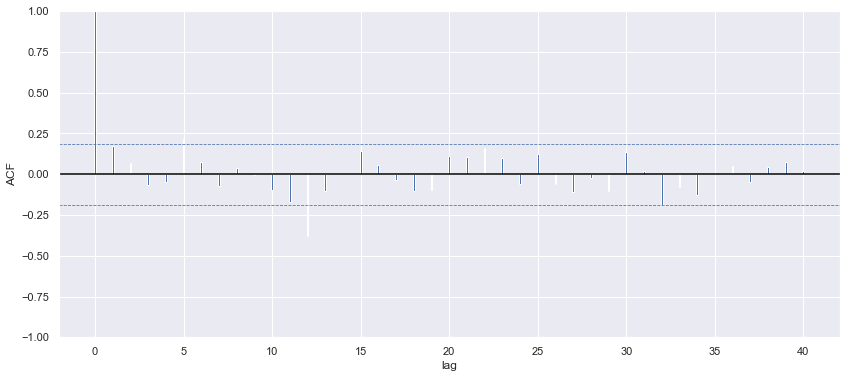

In [78]:
y_dif1 = serie_corr_Elec['corrigee'] - serie_corr_Elec['corrigee'].shift(12)

plot_sortie_acf(acf(np.asarray(y_dif1[13:])), y_len)

q=1 Q=1

In [79]:
adfuller(y_dif1[12:])[1]
#adfuller : H0 la serie n'est pas stationnaire'

0.00020016004074431518

In [80]:
kpss(y_dif1[12:])[1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


0.1

La sortie ACF de la s√©rie ainsi diff√©renci√©e pr√©sente encore une d√©croissance lente vers 0 pour les multiples de 24. On effectue cette fois la diff√©renciation (ùêº‚àíùêµ^12) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


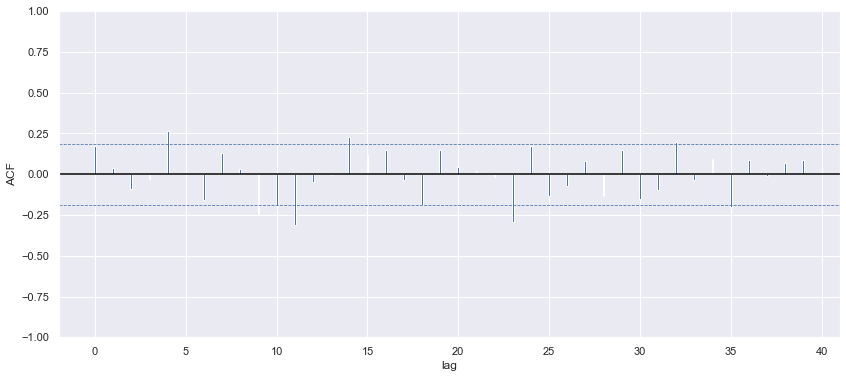

In [81]:
plot_sortie_acf(pacf(np.asarray(y_dif1[13:])), y_len, pacf=True)

## SARIMAX

In [82]:
model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -750.276
Date:                            Mon, 08 Nov 2021   AIC                           1510.551
Time:                                    23:50:37   BIC                           1522.706
Sample:                                         0   HQIC                          1515.437
                                             - 97                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2993      0.251      1.195      0.232      -0.192       0.790
ma.L1         -0.5297      0.241   

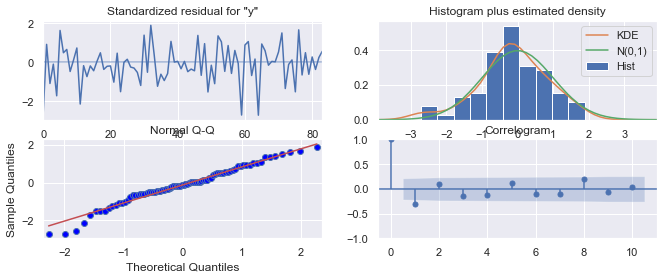

In [83]:
results1.plot_diagnostics()
plt.show()

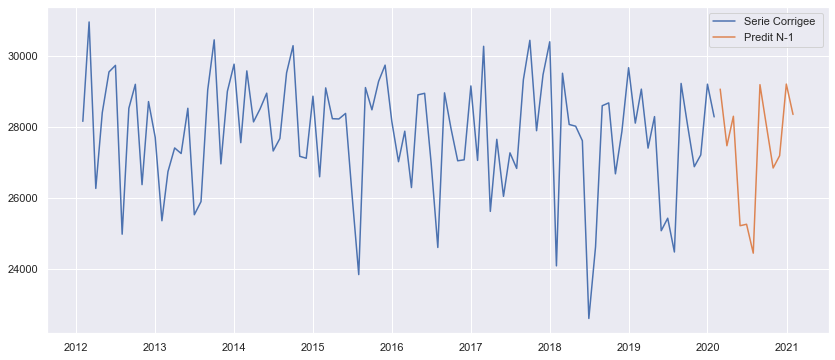

In [84]:
model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
sarima_pred=results1.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee ')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), sarima_pred, label='Predit N-1')
plt.legend() ;

In [85]:
pred_model2tronc = results1.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
MAE_sarima_model2=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model2

1976.4174959276188

In [86]:
serie_corr_Elec.shape

(109, 3)

## Optimal SARIMA

In [87]:
MAE_sarima_model_optim=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model_optim

1976.4174959276188

## Pr√©diction pour ann√©e+1

In [88]:
y= np.asarray(serie_corr_Elec["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


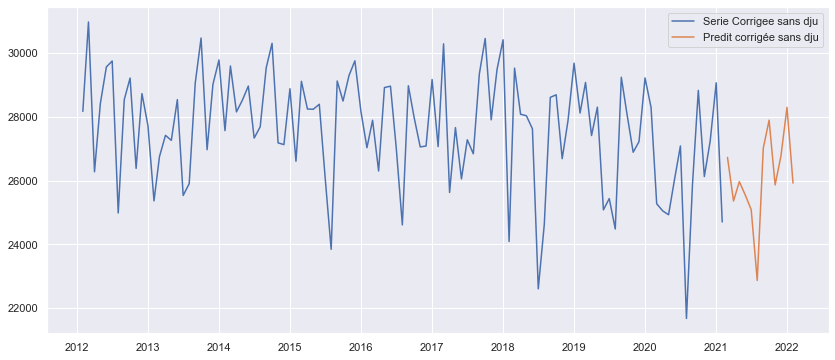

In [89]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_Elec['Mois'],serie_corr_Elec['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(serie_corr_Elec.Mois[len(y)-1],
                       periods=12, freq='M'), hw_pred, label='Predit corrig√©e sans dju')
plt.legend();